## data

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
df = pd.read_csv("data/model/Final_Data_Model.csv")

In [17]:
df

,GEOID,heatweek_avg_qol_calls,normalweek_avg_qol_calls,heatweek_calls_per_1k,normalweek_calls_per_1k,PCT_BACHELORS_PLUS,PCT_RENTERS,PCT_LIMITED_ENGLISH,MEDIAN_INCOME,POVERTY_RATE,PCT_NON_WHITE,PCT_TREE_CANOPY,PCT_IMPERVIOUS,WCR,NDVI,BD,AH,POI_500M_DENSITY,KNN_SUBWAY_dist_mean
0,36005000200,18.2,15.857143,3.737166,3.256087,0.323751,0.397895,0.019587,115064,0.141273,0.845996,11.903162,1.276680,0.011789,0.073005,0.211474,6.968560,0,2536.704079
1,36005000400,8.6,9.285714,1.374461,1.484052,0.337057,0.389779,0.006332,100553,0.060412,0.873741,20.981900,1.340498,0.031757,0.100404,0.144159,8.609242,1,2729.080135
2,36005001600,6.8,7.142857,1.100858,1.156363,0.194351,0.794104,0.015487,41362,0.149807,0.910798,9.801484,1.319109,0.000000,0.106988,0.171576,13.881170,3,1789.242256
3,36005001901,14.2,5.714286,6.510775,2.620030,0.304911,1.000000,0.000000,49500,0.286042,0.786337,1.806034,1.331897,0.010903,0.038412,0.213645,28.281232,19,735.633299
4,36005001902,2.0,4.428571,1.062135,2.351870,0.109692,0.848291,0.005114,67375,0.323043,0.865109,1.802657,1.394687,0.000000,0.026393,0.296425,10.708307,9,824.318546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,36085030301,7.8,7.285714,1.318681,1.231735,0.329011,0.322485,0.009560,111700,0.031472,0.442096,7.199504,1.302354,0.000891,0.040686,0.182600,7.670273,0,6261.935029
2221,36085030302,7.2,9.000000,1.129589,1.411986,0.332815,0.199036,0.000000,98535,0.140608,0.561500,16.091725,1.480558,0.000000,0.117708,0.172271,8.512697,17,6725.564026
2222,36085031901,1.0,1.428571,0.272183,0.388833,0.160000,0.764310,0.013640,45942,0.288409,0.766467,11.745921,1.426573,0.000000,0.155646,0.174834,8.772747,24,7385.739425
2223,36085031902,1.8,4.142857,0.356224,0.819881,0.291336,0.445426,0.015236,75057,0.227788,0.811597,10.057183,1.379358,0.013764,0.099933,0.188949,10.025000,1,7868.889872


In [11]:
# Socioeconomic and demographic predictors.
acs_predictors = [
    "PCT_BACHELORS_PLUS",
    "PCT_RENTERS",
    "PCT_LIMITED_ENGLISH",
    "MEDIAN_INCOME",
    "POVERTY_RATE",
    "PCT_NON_WHITE"
]

# Environmental predictors.
env_predictors = [
    "PCT_TREE_CANOPY",
    "PCT_IMPERVIOUS",
    "WCR",
    "NDVI"
]

# Urban form predictors.
# Parks were HIGHLY correlated to subway.
urban_predictors = [
    "BD",   # Building density.
    "AH",   # Weighted Average building height.
    "POI_500M_DENSITY", # Spatial feature
    "KNN_SUBWAY_dist_mean"
]

# Combined predictor set with all features.
all_predictors = env_predictors + acs_predictors + urban_predictors

# 2 targets
targets = ["heatweek_calls_per_1k", "normalweek_calls_per_1k"]

## OLS

In [9]:
# Define pipeline
ols_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])


In [13]:
results = {}

for target in targets:
    print(f"\n========== OLS Model for {target} ==========")

    X = df[all_predictors].values
    y = df[target].values

    # Fit model
    ols_pipeline.fit(X, y)

    # Predict
    y_pred = ols_pipeline.predict(X)

    # Evaluation
    r2 = r2_score(y, y_pred)

    print(f"R²:   {r2:.4f}")

    # Extract standardized coefficients
    coef = ols_pipeline.named_steps["regressor"].coef_

    # Put into DataFrame
    coef_df = pd.DataFrame({
        "feature": all_predictors,
        "coef_standardized": coef
    }).sort_values("coef_standardized", key=abs, ascending=False)

    print("\nTop coefficients (standardized):")
    print(coef_df.head(10))

    # Save results
    results[target] = coef_df



========== OLS Model for heatweek_calls_per_1k ==========
R²:   0.0629

Top coefficients (standardized):
                feature  coef_standardized
7         MEDIAN_INCOME          -0.877788
3                  NDVI          -0.477433
1        PCT_IMPERVIOUS           0.273264
9         PCT_NON_WHITE          -0.237751
0       PCT_TREE_CANOPY          -0.177183
11                   AH           0.104430
6   PCT_LIMITED_ENGLISH          -0.100524
12     POI_500M_DENSITY          -0.098805
5           PCT_RENTERS          -0.073921
10                   BD          -0.052286

========== OLS Model for normalweek_calls_per_1k ==========
R²:   0.0589

Top coefficients (standardized):
                 feature  coef_standardized
7          MEDIAN_INCOME          -0.723523
3                   NDVI          -0.413217
1         PCT_IMPERVIOUS           0.217818
9          PCT_NON_WHITE          -0.184213
0        PCT_TREE_CANOPY          -0.136502
8           POVERTY_RATE          -0.103725
12   

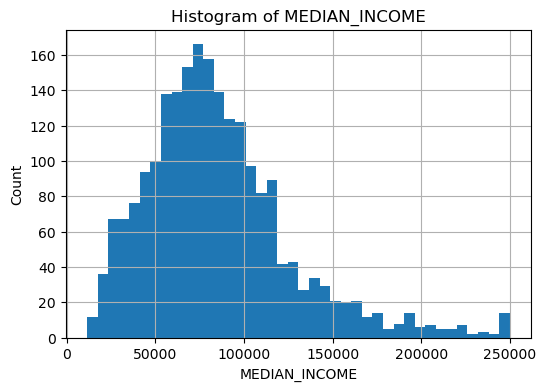

In [37]:
df = df[df["MEDIAN_INCOME"] > 0]

df["MEDIAN_INCOME"].hist(bins=40, figsize=(6,4))
plt.xlabel("MEDIAN_INCOME")
plt.ylabel("Count")
plt.title("Histogram of MEDIAN_INCOME")
plt.show()

In [40]:
import statsmodels.api as sm


X = df[all_predictors]
# y = df["heatweek_calls_per_1k"]  
y = np.log1p(df["heatweek_calls_per_1k"])

X_const = sm.add_constant(X)
ols_sm = sm.OLS(y, X_const).fit()

print(ols_sm.summary())  


                              OLS Regression Results                             
Dep. Variable:     heatweek_calls_per_1k   R-squared:                       0.083
Model:                               OLS   Adj. R-squared:                  0.077
Method:                    Least Squares   F-statistic:                     14.09
Date:                   Thu, 27 Nov 2025   Prob (F-statistic):           7.90e-33
Time:                           02:55:14   Log-Likelihood:                -26.687
No. Observations:                   2200   AIC:                             83.37
Df Residuals:                       2185   BIC:                             168.8
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [42]:
X = df[all_predictors]
# y = df["normalweek_calls_per_1k"]  
y = np.log1p(df["normalweek_calls_per_1k"])

X_const = sm.add_constant(X)
ols_sm = sm.OLS(y, X_const).fit()

print(ols_sm.summary()) 

                               OLS Regression Results                              
Dep. Variable:     normalweek_calls_per_1k   R-squared:                       0.074
Model:                                 OLS   Adj. R-squared:                  0.068
Method:                      Least Squares   F-statistic:                     12.44
Date:                     Thu, 27 Nov 2025   Prob (F-statistic):           1.71e-28
Time:                             02:56:00   Log-Likelihood:                 103.01
No. Observations:                     2200   AIC:                            -176.0
Df Residuals:                         2185   BIC:                            -90.57
Df Model:                               14                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

## RF Model

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# ! pip install shap

In [41]:
# 1. Choose which target to model
target = "heatweek_calls_per_1k"  # 可以改成 normalweek_calls_per_1k 再跑一遍

# Log-transform the target to reduce skewness
df[target] = np.log1p(df[target])

X = df[all_predictors]
y = df[target]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3. Define RF pipeline (no scaler)
rf_pipeline = Pipeline([
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1))
])

# 4. Hyperparameter grid (small, reasonable ranges)
param_grid = {
    "rf__n_estimators": [200, 400],
    "rf__max_depth": [10, 20],
}

# 5. GridSearchCV with 3-fold CV, optimizing RMSE
grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",  # sklearn uses negative for losses
    n_jobs=-1,
    verbose=1
)

# 6. Fit on training data
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

# 7. Evaluate on test data using best model
best_rf_pipeline = grid.best_estimator_

y_pred_test = best_rf_pipeline.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\n=== Test set performance (Random Forest) ===")
print(f"R² (test):   {r2_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")
print(f"MAE (test):  {mae_test:.4f}")


C:\Users\DZM\AppData\Local\Temp\ipykernel_32124\2711642054.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target] = np.log1p(df[target])


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'rf__max_depth': 20, 'rf__n_estimators': 400}
Best CV RMSE: 0.22199106387864864

=== Test set performance (Random Forest) ===
R² (test):   0.2226
RMSE (test): 0.2368
MAE (test):  0.1832


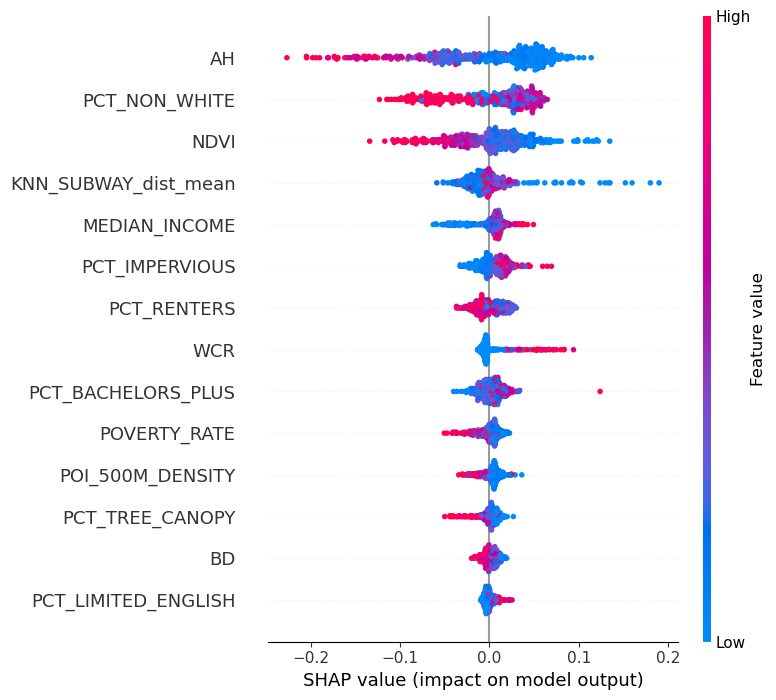

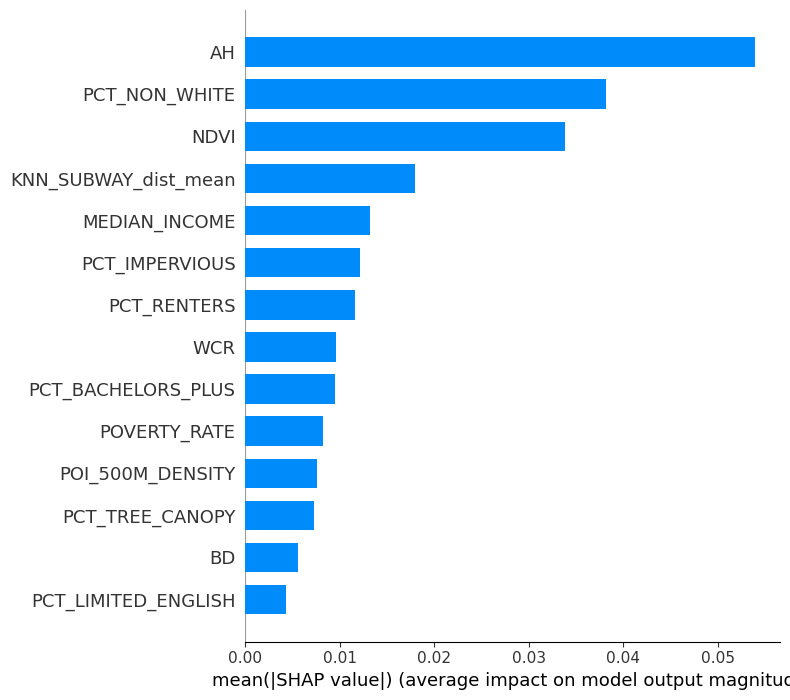

In [44]:
import shap
import matplotlib.pyplot as plt

# Initialize JS visualization (for notebooks)
shap.initjs()

# 1. Get the trained RandomForest model from the pipeline
rf_model = best_rf_pipeline.named_steps["rf"]

# 2. Use training data as background for SHAP
X_train_array = X_train.values  # TreeExplainer can work with numpy arrays
X_test_array = X_test.values

# 3. Build SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# 4. Compute SHAP values for test set
shap_values = explainer.shap_values(X_test_array)  # shape: (n_samples, n_features)

# 5. SHAP summary plot (beeswarm)
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=all_predictors,
    show=True
)

# 6. SHAP bar plot (mean |SHAP| value)
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=all_predictors,
    plot_type="bar",
    show=True
)


<Figure size 600x500 with 0 Axes>

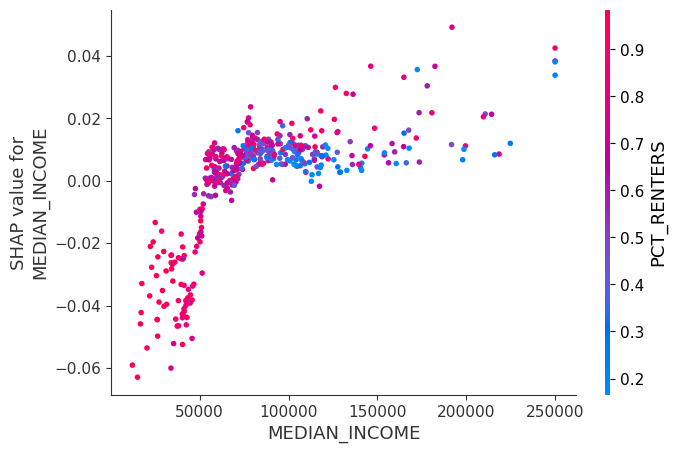

In [45]:
plt.figure(figsize=(6, 5))
shap.dependence_plot(
    "MEDIAN_INCOME",
    shap_values,
    X_test,
    feature_names=all_predictors,
    show=True
)

In [46]:
# 1. Choose which target to model
target = "normalweek_calls_per_1k"  

# Log-transform the target to reduce skewness
df[target] = np.log1p(df[target])

X = df[all_predictors]
y = df[target]

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3. Define RF pipeline (no scaler)
rf_pipeline = Pipeline([
    ("rf", RandomForestRegressor(random_state=42, n_jobs=-1))
])

# 4. Hyperparameter grid (small, reasonable ranges)
param_grid = {
    "rf__n_estimators": [200, 400],
    "rf__max_depth": [10, 20],
}

# 5. GridSearchCV with 3-fold CV, optimizing RMSE
grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",  # sklearn uses negative for losses
    n_jobs=-1,
    verbose=1
)

# 6. Fit on training data
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV RMSE:", -grid.best_score_)

# 7. Evaluate on test data using best model
best_rf_pipeline = grid.best_estimator_

y_pred_test = best_rf_pipeline.predict(X_test)

r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("\n=== Test set performance (Random Forest) ===")
print(f"R² (test):   {r2_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")
print(f"MAE (test):  {mae_test:.4f}")


C:\Users\DZM\AppData\Local\Temp\ipykernel_32124\257844404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target] = np.log1p(df[target])


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'rf__max_depth': 20, 'rf__n_estimators': 400}
Best CV RMSE: 0.20964691112295228

=== Test set performance (Random Forest) ===
R² (test):   0.2165
RMSE (test): 0.2186
MAE (test):  0.1693


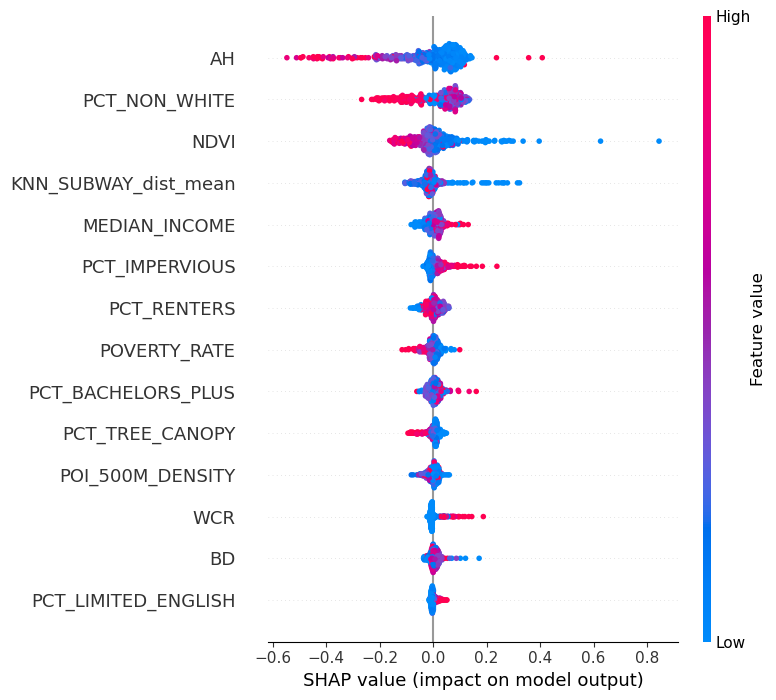

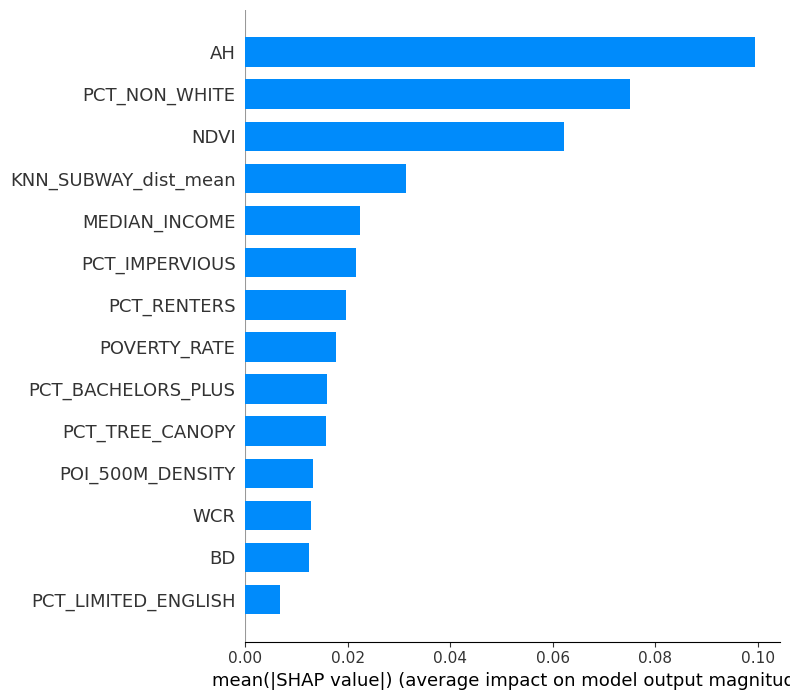

In [30]:
import shap
import matplotlib.pyplot as plt

# Initialize JS visualization (for notebooks)
shap.initjs()

# 1. Get the trained RandomForest model from the pipeline
rf_model = best_rf_pipeline.named_steps["rf"]

# 2. Use training data as background for SHAP
X_train_array = X_train.values  # TreeExplainer can work with numpy arrays
X_test_array = X_test.values

# 3. Build SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# 4. Compute SHAP values for test set
shap_values = explainer.shap_values(X_test_array)  # shape: (n_samples, n_features)

# 5. SHAP summary plot (beeswarm)
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=all_predictors,
    show=True
)

# 6. SHAP bar plot (mean |SHAP| value)
plt.figure(figsize=(8, 6))
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=all_predictors,
    plot_type="bar",
    show=True
)
